# Subgraph Withholding Attack EDA

In [1]:
# standard imports
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', 15)

In [2]:

# function used to query each type of event from The Graph
def query_theGraph_epoch(raw_query, field_name, url, verbose=False):

    query_parts =raw_query.split(')')
    paginator = ", where: {}" 
    n = 0
    records = []
    while n < 1000:
        if (n == 0):
            # order by blockNumber to get all events, as deafult ordering is by id
            query = 'query '+query_parts[0] + 'orderBy:endBlock, where:{id:"1"})' + query_parts[1]
        else:
            query = 'query '+query_parts[0]+ 'orderBy:endBlock, where: {endBlock_gt: ' + str(indexer) + '})'+query_parts[1]

        if verbose:
            print(query)

        r = requests.post(url, json = {'query':query})

        try:
            d = json.loads(r.content)['data'][field_name]
        except:
            print(r.content)
            errors = json.loads(r.content)['errors']
            print(errors)
            for e in errors:
                print(e['message'])

        #print(f'results {len(d)}')
        records.extend(d)
        #print(f'total {len(records)}')
        try:
            indexer = d[-1]['endBlock']
            print(indexer)
        except:
            print('noblock')
        
        n += 1
        if len(d) < 99 and n > 1:
            break
        
    return pd.DataFrame(records)

In [3]:
# function used to query each type of event from The Graph
def query_theGraph_allocation(raw_query, field_name, url, verbose=False):

    query_parts =raw_query.split(')')
    paginator = ", where: {}" 
    n = 1
    records = []
    while n < 506:
        query = 'query '+query_parts[0] + "where:{id:"+str(n)+"})" + query_parts[1]

        if verbose:
            print(query)

        r = requests.post(url, json = {'query':query})

        try:
            print(json.loads(r.content)['data'][field_name])
            d = json.loads(r.content)['data'][field_name]
        except:
            print(r.content)
            errors = json.loads(r.content)['errors']
            print(errors)
            for e in errors:
                print(e['message'])

        #print(f'results {len(d)}')
        records.extend(d)
        #print(f'total {len(records)}')
        n += 1
        
    return pd.DataFrame(records)

In [4]:
#get subgraphs data
url = 'https://api.thegraph.com/subgraphs/name/graphprotocol/graph-network-mainnet'

epoch_query = '''query{
	epoches(){
    id
    signalledTokens
    stakeDeposited
    totalQueryFees
    curatorQueryFees
    totalRewards
    endBlock
  }
}
'''

field_name = 'epoches'

epoch_df = query_theGraph_epoch(epoch_query, field_name, url, False)

11460060
12131306
12795906
13460506
14125106
14789706
14836228


In [5]:
#get subgraphs data
url = 'https://api.thegraph.com/subgraphs/name/graphprotocol/graph-network-mainnet'

epoch_query = '''query{
	pools(){
    id
    allocation
  }
}
'''

field_name = 'pools'

allocation_df = query_theGraph_allocation(epoch_query, field_name, url, False)

[]
[]
[]
[]
[{'id': '5', 'allocation': '23596259040000000000000000'}]
[{'id': '6', 'allocation': '109623900110000000000000000'}]
[{'id': '7', 'allocation': '144402254060000000000000000'}]
[{'id': '8', 'allocation': '251715101935167316600000000'}]
[{'id': '9', 'allocation': '308248466736156376000000000'}]
[{'id': '10', 'allocation': '220601900120717710000000000'}]
[{'id': '11', 'allocation': '1235126465881094806000000000'}]
[{'id': '12', 'allocation': '493860533861040350000000000'}]
[{'id': '13', 'allocation': '589494440424174000000000000'}]
[{'id': '14', 'allocation': '522075314211140000000000000'}]
[{'id': '15', 'allocation': '887844815436320620000000000'}]
[{'id': '16', 'allocation': '460080071353234890000000000'}]
[{'id': '17', 'allocation': '620181503716238600000000000'}]
[{'id': '18', 'allocation': '1605764519592460000000000000'}]
[{'id': '19', 'allocation': '475399277163839900000000000'}]
[{'id': '20', 'allocation': '703283743259400000000000000'}]
[{'id': '21', 'allocation': '681

In [6]:
# function used to query each type of event from The Graph
def query_theGraph_burn(raw_query, field_name, url, trans_type, verbose=False):

    query_parts =raw_query.split(')')
    paginator = ", where: {}" 
    n = 0
    records = []
    while n < 1000:
        if (n == 0):
            # order by blockNumber to get all events, as deafult ordering is by id
            query = 'query '+query_parts[0] + 'orderBy:blockNumber, where:{blockNumber_gt: 0, type:' + trans_type +'})' + query_parts[1]
        else:
            query = 'query '+query_parts[0]+ 'orderBy:blockNumber, where: {blockNumber_gt: ' + str(indexer) + ', type:' + trans_type +'})'+query_parts[1]

        if verbose:
            print(query)

        r = requests.post(url, json = {'query':query})

        try:
            d = json.loads(r.content)['data'][field_name]
        except:
            print(r.content)
            errors = json.loads(r.content)['errors']
            print(errors)
            for e in errors:
                print(e['message'])

        #print(f'results {len(d)}')
        records.extend(d)
        #print(f'total {len(records)}')
        try:
            indexer = d[-1]['blockNumber']
        except:
            print('noblock')
        
        n += 1
        if len(d) < 99:
            break
        
    return pd.DataFrame(records)

In [7]:
#get BurnSignal event
url = 'https://api.thegraph.com/subgraphs/name/graphprotocol/graph-network-mainnet'

created_query = '''query{
  signalTransactions() {
    id
    blockNumber
    signer{
      curator
      {
        id
      }
    }
    signal
    tokens
    type
    subgraphDeployment{
     id
    } 
  }  
}
'''

field_name = 'signalTransactions'
trans_type = 'BurnSignal'

curation_burned_df = query_theGraph_burn(created_query, field_name, url, trans_type, False)

In [8]:
curation_burned_df['tokens'] = curation_burned_df['tokens'].astype(float)
curation_burned_df['tokens'] = curation_burned_df['tokens']/10e18
curation_burned_df

id  blockNumber  \
0     0xf5fd904385312b521779beb91a757a403132ebf7bbf7...     11486499   
1     0x7b0d39ca37ba86fd5e6ecc4433513ffba4b853a90bd2...     11491383   
2     0xe46b8054c269f1c5811dc5cdd0d4564bb92f370477df...     11491393   
3     0x620c0af5345f21ec87c9b73864d3709d735fb7aac155...     11531871   
4     0x10afff8568c6e870a7b596787cb284e43842892e3a74...     12318426   
...                                                 ...          ...   
2617  0xd896c3ae78e3623277fc28bbc9053e8308347fc38831...     14809481   
2618  0xd0cc5f25f8d43398982371cbe35294b952843e466d80...     14812892   
2619  0x493b08ab98e60c61aca2d4a8611bdc8b5df157a17aa7...     14823197   
2620  0xc4eeb9188bec8d4231329c4c5bc055f1f3400a373ddd...     14826149   
2621  0x415cdafe49286b93f9e6c0aeb87fcde20b27c9dc78be...     14826173   

                                                 signer  \
0     {'curator': {'id': '0xadca0dd4729c8ba3acf3e99f...   
1     {'curator': {'id': '0xadca0dd4729c8ba3acf3e99f...   
2     {'curator': {'id': '0xadca0dd4729c8ba3acf3e99f...   
3     {'curator': {'id': '0xadca0dd4729c8ba3acf3e99f...   
4     {'curator': {'id': '0xadca0dd4729c8ba3acf3e99f...   
...                                                 ...   
2617  {'curator': {'id': '0xadca0dd4729c8ba3acf3e99f...   
2618  {'curator': {'id': '0xadca0dd4729c8ba3acf3e99f...   
2619  {'curator': {'id': '0xadca0dd4729c8ba3acf3e99f...   
2620  {'curator': {'id': '0xadca0dd4729c8ba3acf3e99f...   
2621  {'curator': {'id': '0xadca0dd4729c8ba3acf3e99f...   

                     signal        tokens        type  \
0      89477475325111327822  8.055740e+03  BurnSignal   
1                        95  7.702900e-15  BurnSignal   
2      95000000000000000000  6.800402e+03  BurnSignal   
3          1568268903568881  9.750069e-02  BurnSignal   
4       1000000000000000000  5.459313e+01  BurnSignal   
...                     ...           ...         ...   
2617    1224075428571248563  4.029627e+01  BurnSignal   
2618  158231490510273680301  2.685241e+03  BurnSignal   
2619   23001102877411403006  4.724146e+02  BurnSignal   
2620     502709135016492834  3.454149e+01  BurnSignal   
2621     537077942969363095  4.023454e+01  BurnSignal   

                                     subgraphDeployment  
0     {'id': '0x31edcacc9a53bc8ab4be2eeb0d873409da4c...  
1     {'id': '0x31edcacc9a53bc8ab4be2eeb0d873409da4c...  
2     {'id': '0x31edcacc9a53bc8ab4be2eeb0d873409da4c...  
3     {'id': '0x31edcacc9a53bc8ab4be2eeb0d873409da4c...  
4     {'id': '0xbbde25a2c85f55b53b7698b9476610c3d120...  
...                                                 ...  
2617  {'id': '0x07a115441341a7c904c3b8c512e0523b72ae...  
2618  {'id': '0x07a115441341a7c904c3b8c512e0523b72ae...  
2619  {'id': '0x1839cb0f170cc75ed7efc36ec800579fcb0a...  
2620  {'id': '0x969f6c63e40c58d6836ce6afb2b71417e34c...  
2621  {'id': '0xa7d9d3a173d3d62ce3d05c2d29f3447b04ed...  

[2622 rows x 7 columns]

In [9]:
curation_burned_df['epoch'] = (curation_burned_df['blockNumber']  - 11446768) / 6646
curation_burned_df['epoch'] = curation_burned_df['epoch'].astype(int)
curation_burned_df

id  blockNumber  \
0     0xf5fd904385312b521779beb91a757a403132ebf7bbf7...     11486499   
1     0x7b0d39ca37ba86fd5e6ecc4433513ffba4b853a90bd2...     11491383   
2     0xe46b8054c269f1c5811dc5cdd0d4564bb92f370477df...     11491393   
3     0x620c0af5345f21ec87c9b73864d3709d735fb7aac155...     11531871   
4     0x10afff8568c6e870a7b596787cb284e43842892e3a74...     12318426   
...                                                 ...          ...   
2617  0xd896c3ae78e3623277fc28bbc9053e8308347fc38831...     14809481   
2618  0xd0cc5f25f8d43398982371cbe35294b952843e466d80...     14812892   
2619  0x493b08ab98e60c61aca2d4a8611bdc8b5df157a17aa7...     14823197   
2620  0xc4eeb9188bec8d4231329c4c5bc055f1f3400a373ddd...     14826149   
2621  0x415cdafe49286b93f9e6c0aeb87fcde20b27c9dc78be...     14826173   

                                                 signer  \
0     {'curator': {'id': '0xadca0dd4729c8ba3acf3e99f...   
1     {'curator': {'id': '0xadca0dd4729c8ba3acf3e99f...   
2     {'curator': {'id': '0xadca0dd4729c8ba3acf3e99f...   
3     {'curator': {'id': '0xadca0dd4729c8ba3acf3e99f...   
4     {'curator': {'id': '0xadca0dd4729c8ba3acf3e99f...   
...                                                 ...   
2617  {'curator': {'id': '0xadca0dd4729c8ba3acf3e99f...   
2618  {'curator': {'id': '0xadca0dd4729c8ba3acf3e99f...   
2619  {'curator': {'id': '0xadca0dd4729c8ba3acf3e99f...   
2620  {'curator': {'id': '0xadca0dd4729c8ba3acf3e99f...   
2621  {'curator': {'id': '0xadca0dd4729c8ba3acf3e99f...   

                     signal        tokens        type  \
0      89477475325111327822  8.055740e+03  BurnSignal   
1                        95  7.702900e-15  BurnSignal   
2      95000000000000000000  6.800402e+03  BurnSignal   
3          1568268903568881  9.750069e-02  BurnSignal   
4       1000000000000000000  5.459313e+01  BurnSignal   
...                     ...           ...         ...   
2617    1224075428571248563  4.029627e+01  BurnSignal   
2618  158231490510273680301  2.685241e+03  BurnSignal   
2619   23001102877411403006  4.724146e+02  BurnSignal   
2620     502709135016492834  3.454149e+01  BurnSignal   
2621     537077942969363095  4.023454e+01  BurnSignal   

                                     subgraphDeployment  epoch  
0     {'id': '0x31edcacc9a53bc8ab4be2eeb0d873409da4c...      5  
1     {'id': '0x31edcacc9a53bc8ab4be2eeb0d873409da4c...      6  
2     {'id': '0x31edcacc9a53bc8ab4be2eeb0d873409da4c...      6  
3     {'id': '0x31edcacc9a53bc8ab4be2eeb0d873409da4c...     12  
4     {'id': '0xbbde25a2c85f55b53b7698b9476610c3d120...    131  
...                                                 ...    ...  
2617  {'id': '0x07a115441341a7c904c3b8c512e0523b72ae...    505  
2618  {'id': '0x07a115441341a7c904c3b8c512e0523b72ae...    506  
2619  {'id': '0x1839cb0f170cc75ed7efc36ec800579fcb0a...    508  
2620  {'id': '0x969f6c63e40c58d6836ce6afb2b71417e34c...    508  
2621  {'id': '0xa7d9d3a173d3d62ce3d05c2d29f3447b04ed...    508  

[2622 rows x 8 columns]

In [10]:
new_curation_burned_df = curation_burned_df.groupby('epoch').sum()
new_curation_burned_df.drop('blockNumber', axis = 1, inplace = True)
new_curation_burned_df

tokens
epoch              
5       8055.740045
6       6800.402046
12         0.097501
131     7479.322475
132    35502.838396
...             ...
503     3717.460765
504       59.193911
505       40.296275
506     2685.241275
508      547.190650

[257 rows x 1 columns]

In [11]:
missing_epochs = pd.Index(range(510)).difference(new_curation_burned_df.index)
missing_epochs_df = pd.DataFrame(index=missing_epochs, columns=new_curation_burned_df.columns).fillna(0.0)
missing_epochs_df

tokens
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
..      ...
488     0.0
495     0.0
496     0.0
507     0.0
509     0.0

[253 rows x 1 columns]

In [12]:
new_curation_burned_df = pd.concat([new_curation_burned_df, missing_epochs_df])
new_curation_burned_df.sort_index(inplace = True)
new_curation_burned_df['id'] = new_curation_burned_df.index
new_curation_burned_df

tokens   id
0       0.000000    0
1       0.000000    1
2       0.000000    2
3       0.000000    3
4       0.000000    4
..           ...  ...
505    40.296275  505
506  2685.241275  506
507     0.000000  507
508   547.190650  508
509     0.000000  509

[510 rows x 2 columns]

In [13]:
allocation_df

id                    allocation
0      5    23596259040000000000000000
1      6   109623900110000000000000000
2      7   144402254060000000000000000
3      8   251715101935167316600000000
4      9   308248466736156376000000000
..   ...                           ...
496  501   275814979170000000000000000
497  502  4822554366930000000000000000
498  503   974436551010000000000000000
499  504  2300385835430000000000000000
500  505   901173054160000000000000000

[501 rows x 2 columns]

In [14]:
epoch_df

id           signalledTokens              stakeDeposited  \
0      1                         0        10000000000000000000   
1      3                         0   2137573000000000000000000   
2      4  244919450103834483981271  72326775000000000000000000   
3      5                         0  48119513876353513935471811   
4      6                         0  58229882095246030700280898   
..   ...                       ...                         ...   
503  505    9900000000000000000000     22675336586578062009218   
504  506   26718150683123297163951      1685423212691355627000   
505  507     605401371966600000000      1512003011909585045445   
506  508    4322741807715309847757    364978755727497364194967   
507  509    5937030000000000000000    417356231665274469142434   

            totalQueryFees      curatorQueryFees              totalRewards  \
0                        0                     0                         0   
1                        0                     0                         0   
2                        0                     0                         0   
3                        0                     0  690612880086046382273295   
4                        0                     0  713053968477522628710624   
..                     ...                   ...                       ...   
503                      0                     0  236422921768261313998769   
504                      0                     0  146642334262382708152059   
505                      0                     0   95677224179047745416364   
506  236051500709296005547  23369098570220304548  373465772153277133289083   
507                      0                     0  151159295998260585207243   

     endBlock  
0    11460060  
1    11473352  
2    11479998  
3    11486644  
4    11493290  
..        ...  
503  14809644  
504  14816290  
505  14822936  
506  14829582  
507  14836228  

[508 rows x 7 columns]

In [15]:
epoch_df['id'] = epoch_df['id'].astype(int)
missing_epochs = pd.Index(range(510)).difference(epoch_df.id)
missing_epochs_df = pd.DataFrame(index=missing_epochs, columns=epoch_df.columns).fillna(0.0)
missing_epochs_df['id'] = missing_epochs_df.index
epoch_df
new_epoch_df = pd.concat([epoch_df, missing_epochs_df])
new_epoch_df

id           signalledTokens              stakeDeposited  \
0      1                         0        10000000000000000000   
1      3                         0   2137573000000000000000000   
2      4  244919450103834483981271  72326775000000000000000000   
3      5                         0  48119513876353513935471811   
4      6                         0  58229882095246030700280898   
..   ...                       ...                         ...   
505  507     605401371966600000000      1512003011909585045445   
506  508    4322741807715309847757    364978755727497364194967   
507  509    5937030000000000000000    417356231665274469142434   
0      0                       0.0                         0.0   
2      2                       0.0                         0.0   

            totalQueryFees      curatorQueryFees              totalRewards  \
0                        0                     0                         0   
1                        0                     0                         0   
2                        0                     0                         0   
3                        0                     0  690612880086046382273295   
4                        0                     0  713053968477522628710624   
..                     ...                   ...                       ...   
505                      0                     0   95677224179047745416364   
506  236051500709296005547  23369098570220304548  373465772153277133289083   
507                      0                     0  151159295998260585207243   
0                      0.0                   0.0                       0.0   
2                      0.0                   0.0                       0.0   

       endBlock  
0    11460060.0  
1    11473352.0  
2    11479998.0  
3    11486644.0  
4    11493290.0  
..          ...  
505  14822936.0  
506  14829582.0  
507  14836228.0  
0           0.0  
2           0.0  

[510 rows x 7 columns]

In [16]:
new_epoch_df.sort_values(by='id', inplace=True)
new_epoch_df

id           signalledTokens              stakeDeposited  \
0      0                       0.0                         0.0   
0      1                         0        10000000000000000000   
2      2                       0.0                         0.0   
1      3                         0   2137573000000000000000000   
2      4  244919450103834483981271  72326775000000000000000000   
..   ...                       ...                         ...   
503  505    9900000000000000000000     22675336586578062009218   
504  506   26718150683123297163951      1685423212691355627000   
505  507     605401371966600000000      1512003011909585045445   
506  508    4322741807715309847757    364978755727497364194967   
507  509    5937030000000000000000    417356231665274469142434   

            totalQueryFees      curatorQueryFees              totalRewards  \
0                      0.0                   0.0                       0.0   
0                        0                     0                         0   
2                      0.0                   0.0                       0.0   
1                        0                     0                         0   
2                        0                     0                         0   
..                     ...                   ...                       ...   
503                      0                     0  236422921768261313998769   
504                      0                     0  146642334262382708152059   
505                      0                     0   95677224179047745416364   
506  236051500709296005547  23369098570220304548  373465772153277133289083   
507                      0                     0  151159295998260585207243   

       endBlock  
0           0.0  
0    11460060.0  
2           0.0  
1    11473352.0  
2    11479998.0  
..          ...  
503  14809644.0  
504  14816290.0  
505  14822936.0  
506  14829582.0  
507  14836228.0  

[510 rows x 7 columns]

In [17]:
new_epoch_df['signalledTokens'] = new_epoch_df['signalledTokens'].astype(float)
new_epoch_df['signalledTokens'] = new_epoch_df['signalledTokens']/10e18
new_epoch_df['stakeDeposited'] = new_epoch_df['stakeDeposited'].astype(float)
new_epoch_df['stakeDeposited'] = new_epoch_df['stakeDeposited']/10e18
new_epoch_df['totalQueryFees'] = new_epoch_df['totalQueryFees'].astype(float)
new_epoch_df['totalQueryFees'] = new_epoch_df['totalQueryFees']/10e18
new_epoch_df['curatorQueryFees'] = new_epoch_df['curatorQueryFees'].astype(float)
new_epoch_df['curatorQueryFees'] = new_epoch_df['curatorQueryFees']/10e18
new_epoch_df['totalRewards'] = new_epoch_df['totalRewards'].astype(float)
new_epoch_df['totalRewards'] = new_epoch_df['totalRewards']/10e18

In [18]:
allocation_df['id'] = allocation_df['id'].astype(int)
missing_allocations = pd.Index(range(510)).difference(allocation_df.id)
missing_allocations_df = pd.DataFrame(index=missing_allocations, columns=allocation_df.columns).fillna(0.0)
missing_allocations_df['id'] = missing_allocations_df.index
allocation_df
new_allocation_df = pd.concat([allocation_df, missing_allocations_df])
new_allocation_df

id                   allocation
0      5   23596259040000000000000000
1      6  109623900110000000000000000
2      7  144402254060000000000000000
3      8  251715101935167316600000000
4      9  308248466736156376000000000
..   ...                          ...
4      4                          0.0
506  506                          0.0
507  507                          0.0
508  508                          0.0
509  509                          0.0

[510 rows x 2 columns]

In [19]:
new_allocation_df.sort_values(by='id', inplace=True)
new_allocation_df

id                   allocation
0      0                          0.0
1      1                          0.0
2      2                          0.0
3      3                          0.0
4      4                          0.0
..   ...                          ...
500  505  901173054160000000000000000
506  506                          0.0
507  507                          0.0
508  508                          0.0
509  509                          0.0

[510 rows x 2 columns]

In [20]:
new_allocation_df['allocation'] = new_allocation_df['allocation'].astype(float)
new_allocation_df['allocation'] = new_allocation_df['allocation']/10e18

In [22]:
all_df = pd.merge(new_allocation_df, new_epoch_df)
all_df = pd.merge(all_df, new_curation_burned_df)
all_df

id    allocation  signalledTokens  stakeDeposited  totalQueryFees  \
0      0  0.000000e+00         0.000000    0.000000e+00         0.00000   
1      1  0.000000e+00         0.000000    1.000000e+00         0.00000   
2      2  0.000000e+00         0.000000    0.000000e+00         0.00000   
3      3  0.000000e+00         0.000000    2.137573e+05         0.00000   
4      4  0.000000e+00     24491.945010    7.232678e+06         0.00000   
..   ...           ...              ...             ...             ...   
505  505  9.011731e+07       990.000000    2.267534e+03         0.00000   
506  506  0.000000e+00      2671.815068    1.685423e+02         0.00000   
507  507  0.000000e+00        60.540137    1.512003e+02         0.00000   
508  508  0.000000e+00       432.274181    3.649788e+04        23.60515   
509  509  0.000000e+00       593.703000    4.173562e+04         0.00000   

     curatorQueryFees  totalRewards    endBlock       tokens  
0             0.00000      0.000000         0.0     0.000000  
1             0.00000      0.000000  11460060.0     0.000000  
2             0.00000      0.000000         0.0     0.000000  
3             0.00000      0.000000  11473352.0     0.000000  
4             0.00000      0.000000  11479998.0     0.000000  
..                ...           ...         ...          ...  
505           0.00000  23642.292177  14809644.0    40.296275  
506           0.00000  14664.233426  14816290.0  2685.241275  
507           0.00000   9567.722418  14822936.0     0.000000  
508           2.33691  37346.577215  14829582.0   547.190650  
509           0.00000  15115.929600  14836228.0     0.000000  

[510 rows x 9 columns]

In [23]:
all_df.rename({'tokens': 's_burned'}, axis = 1, inplace = True)
all_df

id    allocation  signalledTokens  stakeDeposited  totalQueryFees  \
0      0  0.000000e+00         0.000000    0.000000e+00         0.00000   
1      1  0.000000e+00         0.000000    1.000000e+00         0.00000   
2      2  0.000000e+00         0.000000    0.000000e+00         0.00000   
3      3  0.000000e+00         0.000000    2.137573e+05         0.00000   
4      4  0.000000e+00     24491.945010    7.232678e+06         0.00000   
..   ...           ...              ...             ...             ...   
505  505  9.011731e+07       990.000000    2.267534e+03         0.00000   
506  506  0.000000e+00      2671.815068    1.685423e+02         0.00000   
507  507  0.000000e+00        60.540137    1.512003e+02         0.00000   
508  508  0.000000e+00       432.274181    3.649788e+04        23.60515   
509  509  0.000000e+00       593.703000    4.173562e+04         0.00000   

     curatorQueryFees  totalRewards    endBlock     s_burned  
0             0.00000      0.000000         0.0     0.000000  
1             0.00000      0.000000  11460060.0     0.000000  
2             0.00000      0.000000         0.0     0.000000  
3             0.00000      0.000000  11473352.0     0.000000  
4             0.00000      0.000000  11479998.0     0.000000  
..                ...           ...         ...          ...  
505           0.00000  23642.292177  14809644.0    40.296275  
506           0.00000  14664.233426  14816290.0  2685.241275  
507           0.00000   9567.722418  14822936.0     0.000000  
508           2.33691  37346.577215  14829582.0   547.190650  
509           0.00000  15115.929600  14836228.0     0.000000  

[510 rows x 9 columns]

In [24]:
all_df.rename({'id': 'epoch'}, axis = 1, inplace = True)

In [26]:
all_df['cumulative_tokens'] = all_df['stakeDeposited'] + all_df['signalledTokens'] + all_df['totalQueryFees'] + all_df['curatorQueryFees'] + all_df['totalRewards'] + all_df['allocation']
all_df['cumulative_tokens_with_burn'] = all_df['stakeDeposited'] + all_df['signalledTokens'] + all_df['totalQueryFees'] + all_df['curatorQueryFees'] + all_df['totalRewards'] + all_df['allocation'] - all_df['s_burned']
all_df['total_supply'] = all_df['cumulative_tokens'].cumsum()
all_df['total_supply_with_burn'] = all_df['total_supply'] - all_df['s_burned']
all_df['signalled_total'] = all_df['signalledTokens'].cumsum()
all_df['signaled_total_with_burn'] = all_df['signalled_total'] - all_df['s_burned']
all_df

epoch    allocation  signalledTokens  stakeDeposited  totalQueryFees  \
0        0  0.000000e+00         0.000000    0.000000e+00         0.00000   
1        1  0.000000e+00         0.000000    1.000000e+00         0.00000   
2        2  0.000000e+00         0.000000    0.000000e+00         0.00000   
3        3  0.000000e+00         0.000000    2.137573e+05         0.00000   
4        4  0.000000e+00     24491.945010    7.232678e+06         0.00000   
..     ...           ...              ...             ...             ...   
505    505  9.011731e+07       990.000000    2.267534e+03         0.00000   
506    506  0.000000e+00      2671.815068    1.685423e+02         0.00000   
507    507  0.000000e+00        60.540137    1.512003e+02         0.00000   
508    508  0.000000e+00       432.274181    3.649788e+04        23.60515   
509    509  0.000000e+00       593.703000    4.173562e+04         0.00000   

     curatorQueryFees  totalRewards    endBlock     s_burned  \
0             0.00000      0.000000         0.0     0.000000   
1             0.00000      0.000000  11460060.0     0.000000   
2             0.00000      0.000000         0.0     0.000000   
3             0.00000      0.000000  11473352.0     0.000000   
4             0.00000      0.000000  11479998.0     0.000000   
..                ...           ...         ...          ...   
505           0.00000  23642.292177  14809644.0    40.296275   
506           0.00000  14664.233426  14816290.0  2685.241275   
507           0.00000   9567.722418  14822936.0     0.000000   
508           2.33691  37346.577215  14829582.0   547.190650   
509           0.00000  15115.929600  14836228.0     0.000000   

     cumulative_tokens  cumulative_tokens_with_burn  total_supply  \
0         0.000000e+00                 0.000000e+00  0.000000e+00   
1         1.000000e+00                 1.000000e+00  1.000000e+00   
2         0.000000e+00                 0.000000e+00  1.000000e+00   
3         2.137573e+05                 2.137573e+05  2.137583e+05   
4         7.257169e+06                 7.257169e+06  7.470928e+06   
..                 ...                          ...           ...   
505       9.014421e+07                 9.014416e+07  1.304414e+11   
506       1.750459e+04                 1.481935e+04  1.304414e+11   
507       9.779463e+03                 9.779463e+03  1.304414e+11   
508       7.430267e+04                 7.375548e+04  1.304415e+11   
509       5.744526e+04                 5.744526e+04  1.304416e+11   

     total_supply_with_burn  signalled_total  signaled_total_with_burn  
0              0.000000e+00     0.000000e+00              0.000000e+00  
1              1.000000e+00     0.000000e+00              0.000000e+00  
2              1.000000e+00     0.000000e+00              0.000000e+00  
3              2.137583e+05     0.000000e+00              0.000000e+00  
4              7.470928e+06     2.449195e+04              2.449195e+04  
..                      ...              ...                       ...  
505            1.304414e+11     2.104500e+06              2.104459e+06  
506            1.304414e+11     2.107172e+06              2.104486e+06  
507            1.304414e+11     2.107232e+06              2.107232e+06  
508            1.304415e+11     2.107664e+06              2.107117e+06  
509            1.304416e+11     2.108258e+06              2.108258e+06  

[510 rows x 15 columns]

In [30]:
np.max(all_df['signalled_total'] - all_df['signaled_total_with_burn'])

154637.72370164818

In [33]:
np.average(all_df['signalled_total'])

1095140.7171740993

In [31]:
np.average(all_df['signalled_total'] - all_df['signaled_total_with_burn'])

3507.9975066952843

In [34]:
all_df.to_csv('./total_supply.csv')

In [35]:
curation_df = pd.read_csv('../curation_events/curation_events.csv')
curation_df.drop('Unnamed: 0', axis = 1, inplace = True)
curation_df

id  blockNumber  \
0     0x4c1060853752b5221b1e27c2264034d0bd5fd86c5267...     11474121   
1     0xea7dbe2f6164530a53ac8cf9d99b46993f44d8ca8258...     11476852   
2     0xfbdb37e510284ebbeb45fbfdf28191219faf84bc31bf...     11476875   
3     0xfbda17a348fb979ad36e27445d656b23458a938fadd2...     11476931   
4     0x12925f181018abc41ef4fd32c6e95dab9ff85a6a8337...     11692858   
...                                                 ...          ...   
7506  0xdc0c94cb7576fd82b40d94a5f18e46eab340d2070fd6...     14704848   
7507  0xcb7f61c448b0c42f509dc96047522ee702f1aee07e42...     14705527   
7508  0x62d394c215c6ce5725ea35612542c67837b3511b8221...     14707168   
7509  0x4dd275879e57dc2afc1cefd5ff39af9cea1a5c783cdc...     14707641   
7510  0xf255413ad700a4466f7ef0dada5b7fefe419861b622e...     14710083   

                                          signer         type  \
0     0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd  MintNSignal   
1     0x0f3cf18b37c55f5a319d6cae8d8ba114cb094af0  MintNSignal   
2     0x0f3cf18b37c55f5a319d6cae8d8ba114cb094af0  MintNSignal   
3     0xb6916933aa0bac4b6d09260719c4055363642745  MintNSignal   
4     0x4f4538e2553c61bce747f73c5fe8133d4b383dda  MintNSignal   
...                                          ...          ...   
7506  0x79bdd2c976685f500a6e0f601b496acff20b56a7  MintNSignal   
7507  0xf6c0366cc3454c259b2d4864fa6bb3874e2590a5  MintNSignal   
7508  0x0b5cf9dc29003890f791553e1e9b447339e35df3  MintNSignal   
7509  0x0b5cf9dc29003890f791553e1e9b447339e35df3  MintNSignal   
7510  0xc60b5fd2132d522aca4505e3a85accba59a26fe9  MintNSignal   

                 nameSignal          versionSignal                   tokens  \
0     279284800875378823397  279284800875378823397  80000000000000000000000   
1        627949250367270370     627949250367270370    360151469700892136118   
2     125503147008134479971  125503147008134479971  88216309708626528177242   
3      89477475325111327822   89477475325111327822  82622974825605383769993   
4       3085781289271725739    3085781289271725739   2000000000000000000000   
...                     ...                    ...                      ...   
7506   99498743710661995473   99498743710661995473  10000000000000000000000   
7507   65671660990071637813   65671660990071637813  28598662055154772118285   
7508    1407124727947028866    1407124727947028866      2000000000000000000   
7509    1407124727947028866    1407124727947028866      2000000000000000000   
7510    5235237108916188781    5235237108916188781   1448100000000000000000   

                                        subgraphId  \
0      ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasUtXCvN   
1      ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasUtXCvN   
2      ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasUtXCvN   
3      ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasUtXCvN   
4      ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasUtXCvN   
...                                            ...   
7506  DfD1tZSmDtjCGC2LeYEQbVzj9j8kNqKAQEsYL27Vg6Sw   
7507  7QP7oCLbEAjejkp7wSLTD1zbRMSiDydAmALksBB5E6i1   
7508  5gyzN7gutVUnen2mi7HEFdgm9q2vkcaaYd4BBE9GA9WT   
7509  9yhUteMHTNCqydn2gBHcNJ7wERu1KN6H6NJvB9nqi3Fq   
7510  EjtE3sBkYYAwr45BASiFp8cSZEvd1VHTzzYFvJwQUuJx   

                                   subgraphDeploymentID  subgraphversion  \
0     0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...                0   
1     0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...                0   
2     0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...                0   
3     0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...                0   
4     0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...                0   
...                                                 ...              ...   
7506  0x83fc1011f4ab60f6c9e693785c731604affbefbeeccb...                0   
7507  0xc0bb19a3321ddd3ee6a956bdea9c98e5954feb57d4c2...                0   
7508  0xb952f95b17a00987492361e8aecc1e5e4a7c508b8d5e...                0   
7509  0x22df70e1bcbab8f5660ecb9421637a61d76608859

In [36]:
curation_df['epoch'] = (curation_df['blockNumber'] - 11446768) / 6646
curation_df['epoch'] = curation_df['epoch'].astype(int)

In [37]:
curation_df['tokens'] = curation_df['tokens'].astype(float)
curation_df['tokens'] = curation_df['tokens']/10e18

In [38]:
curation_by_subgraph = {}
for i, j in curation_df.iterrows():
    if j['subgraphId'] not in curation_by_subgraph:
        curation_by_subgraph[j['subgraphname']] = {}
        curation_by_subgraph[j['subgraphname']][j['epoch']] = j['tokens']
    else:
        curation_by_subgraph[j['subgraphname']][j['epoch']] = j['tokens']
curation_by_subgraph_df = pd.DataFrame(curation_by_subgraph)
curation_by_subgraph_df

PoolTogether  RAI Mainnet  mStable Protocol  UMA Mainnet Voting  \
201          68.5          NaN               NaN                 NaN   
433           NaN        500.0               NaN                 NaN   
442           NaN          NaN            1584.0                 NaN   
489           NaN          NaN               NaN               110.0   
457           NaN          NaN               NaN                 NaN   
..            ...          ...               ...                 ...   
471           NaN          NaN               NaN                 NaN   
477           NaN          NaN               NaN                 NaN   
479           NaN          NaN               NaN                 NaN   
480           NaN          NaN               NaN                 NaN   
482           NaN          NaN               NaN                 NaN   

     Opyn Gamma Mainnet  DODOEX V2  Omen  Audius Network Mainnet  \
201                 NaN        NaN   NaN                     NaN   
433                 NaN        NaN   NaN                     NaN   
442                 NaN        NaN   NaN                   199.7   
489                 NaN        NaN   NaN                     NaN   
457               0.001      0.005   NaN                     NaN   
..                  ...        ...   ...                     ...   
471                 NaN        NaN   NaN                     NaN   
477                 NaN        NaN   NaN                     NaN   
479                 NaN        NaN   NaN                     NaN   
480                 NaN        NaN   NaN                     NaN   
482                 NaN        NaN   NaN                     NaN   

     Enzyme Finance  Livepeer  ...  Swapr Mainnet  gnosis-safe-mainnet  \
201             NaN       NaN  ...            NaN                  NaN   
433             NaN       NaN  ...            NaN                  NaN   
442             NaN       NaN  ...            NaN                  NaN   
489             NaN       NaN  ...            NaN                  NaN   
457             NaN       NaN  ...            NaN                  NaN   
..              ...       ...  ...            ...                  ...   
471             NaN       NaN  ...            NaN                  NaN   
477             NaN       NaN  ...            NaN                  NaN   
479             NaN       NaN  ...            NaN                  NaN   
480             NaN       NaN  ...            NaN                  NaN   
482             NaN       NaN  ...         1000.0                140.0   

     DODOEX V2 Polygon  UpstreamCollectives  Scab Shop  chainlink-mainnet-ocr  \
201                NaN                  NaN        NaN                    NaN   
433                NaN                  NaN        NaN                    NaN   
442                NaN                  NaN        NaN                    NaN   
489                NaN                 11.9        NaN                    NaN   
457                NaN                  NaN        NaN                    NaN   
..                 ...                  ...        ...                    ...   
471                NaN                  NaN        NaN                    NaN   
477                NaN                  NaN        NaN                    NaN   
479                NaN                  NaN        NaN                    NaN   
480                NaN                  NaN        NaN                    NaN   
482                NaN                  NaN        NaN                    NaN   

     Ampleforth DAO  Connext Network  cb-extn0502mn  cb-ext0502mn2  
201             NaN              NaN            NaN            NaN  
433             NaN              NaN            NaN            NaN  
442             NaN              NaN            NaN            NaN  
489             NaN              NaN            NaN            NaN  
457             NaN              NaN            NaN            NaN  
..              ...              ...           

In [39]:
missing_epochs = pd.Index(range(492)).difference(curation_by_subgraph_df.index)
missing_epochs_df = pd.DataFrame(index=missing_epochs, columns=curation_by_subgraph_df.columns).fillna(0.0)
full_df = pd.concat([curation_by_subgraph_df, missing_epochs_df])

In [40]:
full_df = full_df.sort_index()
full_df = full_df.fillna(0)
full_df

PoolTogether  RAI Mainnet  mStable Protocol  UMA Mainnet Voting  \
0             0.0          0.0               0.0                 0.0   
1             0.0          0.0               0.0                 0.0   
2             0.0          0.0               0.0                 0.0   
3             0.0          0.0               0.0                 0.0   
4             0.0          0.0               0.0                 0.0   
..            ...          ...               ...                 ...   
487           0.0          0.0               0.0                 0.0   
488           0.0          0.0               0.0                 0.0   
489           0.0          0.0               0.0               110.0   
490           0.0          0.0               0.0                 0.0   
491           0.0          0.0               0.0                 0.0   

     Opyn Gamma Mainnet  DODOEX V2  Omen  Audius Network Mainnet  \
0                   0.0        0.0   0.0                     0.0   
1                   0.0        0.0   0.0                     0.0   
2                   0.0        0.0   0.0                     0.0   
3                   0.0        0.0   0.0                     0.0   
4                   0.0        0.0   0.0                     0.0   
..                  ...        ...   ...                     ...   
487                 0.0        0.0   0.0                     0.0   
488                 0.0        0.0   0.0                     0.0   
489                 0.0        0.0   0.0                     0.0   
490                 0.0        0.0   0.0                     0.0   
491                 0.0        0.0   0.0                     0.0   

     Enzyme Finance  Livepeer  ...  Swapr Mainnet  gnosis-safe-mainnet  \
0               0.0       0.0  ...            0.0                  0.0   
1               0.0       0.0  ...            0.0                  0.0   
2               0.0       0.0  ...            0.0                  0.0   
3               0.0       0.0  ...            0.0                  0.0   
4               0.0       0.0  ...            0.0                  0.0   
..              ...       ...  ...            ...                  ...   
487             0.0       0.0  ...            0.0                  0.0   
488             0.0       0.0  ...            0.0                  0.0   
489             0.0       0.0  ...            0.0                  0.0   
490             0.0       0.0  ...            0.0                  0.0   
491             0.0       0.0  ...            0.0                  0.0   

     DODOEX V2 Polygon  UpstreamCollectives  Scab Shop  chainlink-mainnet-ocr  \
0                  0.0                  0.0        0.0                    0.0   
1                  0.0                  0.0        0.0                    0.0   
2                  0.0                  0.0        0.0                    0.0   
3                  0.0                  0.0        0.0                    0.0   
4                  0.0                  0.0        0.0                    0.0   
..                 ...                  ...        ...                    ...   
487                0.0                  0.0        0.0                    0.0   
488                0.0                  0.0        0.0                    0.0   
489                0.0                 11.9        0.0                    0.0   
490               50.0                  0.0        0.0                    0.0   
491                0.0                  0.0        0.0                    0.0   

     Ampleforth DAO  Connext Network  cb-extn0502mn  cb-ext0502mn2  
0               0.0              0.0            0.0            0.0  
1               0.0              0.0            0.0            0.0  
2               0.0              0.0            0.0            0.0  
3               0.0              0.0            0.0            0.0  
4               0.0              0.0            0.0            0.0  
..              ...              ...           

In [41]:
for i in full_df.columns:
    full_df[i] = full_df[i].cumsum()
full_df

PoolTogether  RAI Mainnet  mStable Protocol  UMA Mainnet Voting  \
0             0.0          0.0               0.0                 0.0   
1             0.0          0.0               0.0                 0.0   
2             0.0          0.0               0.0                 0.0   
3             0.0          0.0               0.0                 0.0   
4             0.0          0.0               0.0                 0.0   
..            ...          ...               ...                 ...   
487          68.5        500.0            1584.0                 0.0   
488          68.5        500.0            1584.0                 0.0   
489          68.5        500.0            1584.0               110.0   
490          68.5        500.0            1584.0               110.0   
491          68.5        500.0            1584.0               110.0   

     Opyn Gamma Mainnet  DODOEX V2  Omen  Audius Network Mainnet  \
0                 0.000      0.000   0.0                     0.0   
1                 0.000      0.000   0.0                     0.0   
2                 0.000      0.000   0.0                     0.0   
3                 0.000      0.000   0.0                     0.0   
4                 0.000      0.000   0.0                     0.0   
..                  ...        ...   ...                     ...   
487               0.001      0.005  30.0                   199.7   
488               0.001      0.005  30.0                   199.7   
489               0.001      0.005  30.0                   199.7   
490               0.001      0.005  30.0                   199.7   
491               0.001      0.005  30.0                   199.7   

     Enzyme Finance  Livepeer  ...  Swapr Mainnet  gnosis-safe-mainnet  \
0               0.0      0.00  ...            0.0                  0.0   
1               0.0      0.00  ...            0.0                  0.0   
2               0.0      0.00  ...            0.0                  0.0   
3               0.0      0.00  ...            0.0                  0.0   
4               0.0      0.00  ...            0.0                  0.0   
..              ...       ...  ...            ...                  ...   
487            13.1    248.17  ...         1000.0                140.0   
488            13.1    248.17  ...         1000.0                140.0   
489            13.1    248.17  ...         1000.0                140.0   
490            13.1    248.17  ...         1000.0                140.0   
491            13.1    248.17  ...         1000.0                140.0   

     DODOEX V2 Polygon  UpstreamCollectives  Scab Shop  chainlink-mainnet-ocr  \
0                  0.0                  0.0        0.0               0.000000   
1                  0.0                  0.0        0.0               0.000000   
2                  0.0                  0.0        0.0               0.000000   
3                  0.0                  0.0        0.0               0.000000   
4                  0.0                  0.0        0.0               0.000000   
..                 ...                  ...        ...                    ...   
487                0.0                  0.0      100.0             953.639055   
488                0.0                  0.0      100.0             953.639055   
489                0.0                 11.9      100.0             953.639055   
490               50.0                 11.9      100.0             953.639055   
491               50.0                 11.9      100.0             953.639055   

     Ampleforth DAO  Connext Network  cb-extn0502mn  cb-ext0502mn2  
0               0.0              0.0            0.0            0.0  
1               0.0              0.0            0.0            0.0  
2               0.0              0.0            0.0            0.0  
3               0.0              0.0            0.0            0.0  
4               0.0              0.0            0.0            0.0  
..              ...              ...           

In [42]:
full_df.to_csv('./curation_subgraph.csv')

In [43]:
def query_theGraph(raw_query, field_name, url, verbose=False):

    query_parts =raw_query.split(')')
    paginator = ", where: {}" 
    n = 0
    records = []
    while n < 1000:
        if (n == 0):
            # order by blockNumber to get all events, as deafult ordering is by id
            query = 'query '+query_parts[0] + 'orderBy:blockNumber, where:{blockNumber_gt: 0})' + query_parts[1]
        else:
            query = 'query '+query_parts[0]+ 'orderBy:blockNumber, where: {blockNumber_gt: ' + str(indexer)  +'})'+query_parts[1]

        if verbose:
            print(query)

        r = requests.post(url, json = {'query':query})

        try:
            d = json.loads(r.content)['data'][field_name]
        except:
            print(r.content)
            errors = json.loads(r.content)['errors']
            print(errors)
            for e in errors:
                print(e['message'])

        #print(f'results {len(d)}')
        records.extend(d)
        #print(f'total {len(records)}')
        try:
            indexer = d[-1]['blockNumber']
        except:
            print('noblock')
        
        n += 1
        if len(d) < 99:
            break
        
    return pd.DataFrame(records)

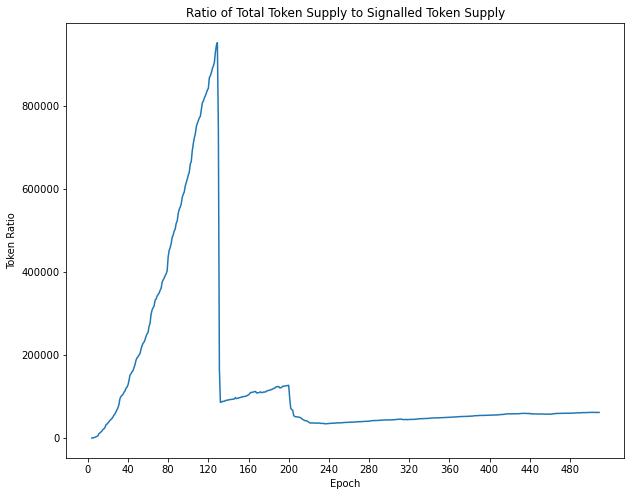

In [44]:
plt.figure(figsize=(10, 8))
plt.plot(all_df['epoch'], all_df['total_supply']/all_df['signalled_total'])
plt.xticks(np.arange(0, 500, step = 40))
plt.xlabel('Epoch')
plt.ylabel('Token Ratio')
plt.title('Ratio of Total Token Supply to Signalled Token Supply');

In [45]:
from sklearn.linear_model import LinearRegression
supply_lr = LinearRegression().fit(all_df[['signalled_total']], all_df['total_supply'])
print('Coefficient:' + str(supply_lr.coef_), 'Intercept:' + str(supply_lr.intercept_))

Coefficient:[46956.45363108] Intercept:8756902453.49276


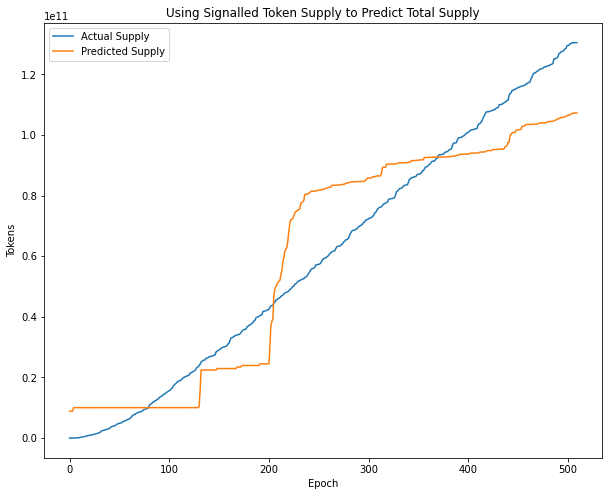

In [46]:
plt.figure(figsize=(10, 8))
plt.plot(all_df['epoch'], all_df['total_supply'])
plt.plot(all_df['epoch'], all_df['signalled_total']*46681.45361051 + 8876118116.660881)
plt.legend(['Actual Supply', 'Predicted Supply'])
plt.xlabel('Epoch')
plt.ylabel('Tokens')
plt.title('Using Signalled Token Supply to Predict Total Supply');

In [47]:
lr_dict = {}
for i in full_df.columns:
    lr = LinearRegression().fit(full_df[[i]], full_df.index)
    lr_dict[i] = (lr.coef_, lr.intercept_)

In [48]:
lr_dict['PoolTogether'][0][0]

3.5912408759124093

In [49]:
full_df.shape

(492, 291)

In [50]:
lr_df = pd.DataFrame(np.zeros(shape=(492,291)), columns=full_df.columns, index=range(0,492))
lr_df

PoolTogether  RAI Mainnet  mStable Protocol  UMA Mainnet Voting  \
0             0.0          0.0               0.0                 0.0   
1             0.0          0.0               0.0                 0.0   
2             0.0          0.0               0.0                 0.0   
3             0.0          0.0               0.0                 0.0   
4             0.0          0.0               0.0                 0.0   
..            ...          ...               ...                 ...   
487           0.0          0.0               0.0                 0.0   
488           0.0          0.0               0.0                 0.0   
489           0.0          0.0               0.0                 0.0   
490           0.0          0.0               0.0                 0.0   
491           0.0          0.0               0.0                 0.0   

     Opyn Gamma Mainnet  DODOEX V2  Omen  Audius Network Mainnet  \
0                   0.0        0.0   0.0                     0.0   
1                   0.0        0.0   0.0                     0.0   
2                   0.0        0.0   0.0                     0.0   
3                   0.0        0.0   0.0                     0.0   
4                   0.0        0.0   0.0                     0.0   
..                  ...        ...   ...                     ...   
487                 0.0        0.0   0.0                     0.0   
488                 0.0        0.0   0.0                     0.0   
489                 0.0        0.0   0.0                     0.0   
490                 0.0        0.0   0.0                     0.0   
491                 0.0        0.0   0.0                     0.0   

     Enzyme Finance  Livepeer  ...  Swapr Mainnet  gnosis-safe-mainnet  \
0               0.0       0.0  ...            0.0                  0.0   
1               0.0       0.0  ...            0.0                  0.0   
2               0.0       0.0  ...            0.0                  0.0   
3               0.0       0.0  ...            0.0                  0.0   
4               0.0       0.0  ...            0.0                  0.0   
..              ...       ...  ...            ...                  ...   
487             0.0       0.0  ...            0.0                  0.0   
488             0.0       0.0  ...            0.0                  0.0   
489             0.0       0.0  ...            0.0                  0.0   
490             0.0       0.0  ...            0.0                  0.0   
491             0.0       0.0  ...            0.0                  0.0   

     DODOEX V2 Polygon  UpstreamCollectives  Scab Shop  chainlink-mainnet-ocr  \
0                  0.0                  0.0        0.0                    0.0   
1                  0.0                  0.0        0.0                    0.0   
2                  0.0                  0.0        0.0                    0.0   
3                  0.0                  0.0        0.0                    0.0   
4                  0.0                  0.0        0.0                    0.0   
..                 ...                  ...        ...                    ...   
487                0.0                  0.0        0.0                    0.0   
488                0.0                  0.0        0.0                    0.0   
489                0.0                  0.0        0.0                    0.0   
490                0.0                  0.0        0.0                    0.0   
491                0.0                  0.0        0.0                    0.0   

     Ampleforth DAO  Connext Network  cb-extn0502mn  cb-ext0502mn2  
0               0.0              0.0            0.0            0.0  
1               0.0              0.0            0.0            0.0  
2               0.0              0.0            0.0            0.0  
3               0.0              0.0            0.0            0.0  
4               0.0              0.0            0.0            0.0  
..              ...              ...           

In [51]:
lr_df['PoolTogether']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
487    0.0
488    0.0
489    0.0
490    0.0
491    0.0
Name: PoolTogether, Length: 492, dtype: float64

In [52]:
for i in lr_dict.keys():
    result_list = []
    for j in range(len(lr_df[i])):
        lr_df[i][j] = lr_dict[i][1] + j*lr_dict[i][0][0]
lr_df

PoolTogether  RAI Mainnet  mStable Protocol  UMA Mainnet Voting  \
0      100.000000      216.000        220.500000          244.000000   
1      103.591241      216.492        220.655303          246.236364   
2      107.182482      216.984        220.810606          248.472727   
3      110.773723      217.476        220.965909          250.709091   
4      114.364964      217.968        221.121212          252.945455   
..            ...          ...               ...                 ...   
487   1848.934307      455.604        296.132576         1333.109091   
488   1852.525547      456.096        296.287879         1335.345455   
489   1856.116788      456.588        296.443182         1337.581818   
490   1859.708029      457.080        296.598485         1339.818182   
491   1863.299270      457.572        296.753788         1342.054545   

     Opyn Gamma Mainnet   DODOEX V2    Omen  Audius Network Mainnet  \
0                 228.0       228.0   231.5              220.500000   
1              246228.0     49428.0   239.7              221.731848   
2              492228.0     98628.0   247.9              222.963696   
3              738228.0    147828.0   256.1              224.195543   
4              984228.0    197028.0   264.3              225.427391   
..                  ...         ...     ...                     ...   
487         119802228.0  23960628.0  4224.9              820.409865   
488         120048228.0  24009828.0  4233.1              821.641713   
489         120294228.0  24059028.0  4241.3              822.873560   
490         120540228.0  24108228.0  4249.5              824.105408   
491         120786228.0  24157428.0  4257.7              825.337256   

     Enzyme Finance    Livepeer  ...  Swapr Mainnet  gnosis-safe-mainnet  \
0        207.000000  241.500000  ...        240.500           240.500000   
1        225.778626  242.491256  ...        240.746           242.257143   
2        244.557252  243.482512  ...        240.992           244.014286   
3        263.335878  244.473768  ...        241.238           245.771429   
4        282.114504  245.465024  ...        241.484           247.528571   
..              ...         ...  ...            ...                  ...   
487     9352.190840  724.241669  ...        360.302          1096.228571   
488     9370.969466  725.232925  ...        360.548          1097.985714   
489     9389.748092  726.224181  ...        360.794          1099.742857   
490     9408.526718  727.215437  ...        361.040          1101.500000   
491     9427.305344  728.206693  ...        361.286          1103.257143   

     DODOEX V2 Polygon  UpstreamCollectives  Scab Shop  chainlink-mainnet-ocr  \
0               244.50           244.000000     242.50             242.500000   
1               249.42           264.672269     244.96             242.757959   
2               254.34           285.344538     247.42             243.015918   
3               259.26           306.016807     249.88             243.273878   
4               264.18           326.689076     252.34             243.531837   
..                 ...                  ...        ...                    ...   
487            2640.54         10311.394958    1440.52             368.126147   
488            2645.46         10332.067227    1442.98             368.384106   
489            2650.38         10352.739496    1445.44             368.642065   
490            2655.30         10373.411765    1447.90             368.900025   
491            2660.22         10394.084034    1450.36             369.157984   

     Ampleforth DAO  Connext Network  cb-extn0502mn  cb-ext0502mn2  
0           242.500          244.500          244.5          244.5  
1           242.664          244.746         1474.5         1474.5  
2           242.828          244.992         2704.5         2704.5  
3           242.992          245.238         3934.5         3934.5  
4           243.156          245.484         5164.5     

In [53]:
import plotly.graph_objects as go
df = pd.DataFrame(
    np.random.randint(200, 1500, [506, len(full_df.columns)]),
    columns=full_df.columns,
    index=range(0, 506),
)

fig = go.Figure(
    [
        go.Scatter(x=full_df.index, y=np.full(len(df), np.nan), meta=i, name=i)
        for i in range(2)
    ],
)

fig.update_layout(
    width=2500,
    height=1000,
    updatemenus=[
        {
            "x": b / 3,
            "y": 1.4,
            "active": None,
            "buttons": [
                {
                    "label": c if b == 0 else str(c)+' Regression',
                    "method": "restyle",
                    "args": [{"y": [full_df[c] if b == 0 else lr_df[c]], "name": c if b == 0 else str(c)+' Regression'}, [b]],
                }
                for c in full_df.columns
            ],
        }
        for b in range(2)
    ]
)
